In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df_2012 = pd.read_csv('../../data/csvs/detected_fires_2012.csv', true_values = ['t'], false_values=['f'], index_col=False)
df_2012.columns

Index([u'ogc_fid', u'wkb_geometry', u'area', u'perimeter', u'fire_',
       u'fire_id', u'lat', u'long', u'date', u'julian', u'gmt', u'temp',
       u'spix', u'tpix', u'src', u'sat_src', u'conf', u'frp', u'fire_bool',
       u'urban_areas_bool', u'region_aland', u'region_awater', u'region_name',
       u'region_lsad', u'region_code', u'county_aland', u'county_awater',
       u'county_name', u'county_lsad', u'county_fips', u'state_aland',
       u'state_awater', u'state_name', u'state_lsad', u'state_fips'],
      dtype='object')

In [3]:
df_2012['month'] = df_2012.date.apply(lambda x: x.split('-')[1])
df_2012.eval('land_water_ratio = county_aland / county_awater')
df_2012.fillna(0, inplace=True)

In [4]:
df_2012.land_water_ratio

0           9.333450
1           9.333450
2           9.333450
3           8.451723
4         126.894991
5         126.894991
6         176.001224
7         176.001224
8         105.144298
9         105.144298
10        105.144298
11         93.657627
12        198.687225
13        176.001224
14        234.417450
15          4.447329
16        113.394714
17        110.511527
18        110.511527
19        110.511527
20        573.872932
21        573.872932
22        171.576338
23        171.576338
24        185.875384
25          2.347515
26         37.118013
27         37.118013
28         37.118013
29        356.715321
             ...    
252409      0.000000
252410      0.000000
252411      0.000000
252412      0.000000
252413      0.000000
252414      0.000000
252415      0.000000
252416      0.000000
252417      0.000000
252418      0.000000
252419      0.000000
252420      0.000000
252421      0.000000
252422      0.000000
252423      0.000000
252424      0.000000
252425      0

In [5]:
keep_columns = ['fire_bool', 'lat', 'long', 'gmt', 'frp', 'conf', 'urban_areas_bool', 'month', 'land_water_ratio']

In [6]:
df_2012 = df_2012[keep_columns]
df_2012.columns

Index([u'fire_bool', u'lat', u'long', u'gmt', u'frp', u'conf',
       u'urban_areas_bool', u'month', u'land_water_ratio'],
      dtype='object')

In [7]:
continuous_cols = ['lat', 'long', 'gmt', 'frp', 'conf']
discrete_cols = ['urban_areas_bool', 'month']

In [8]:
for col in continuous_cols: 
    print '-' * 50
    print col 
    print df_2012.query('fire_bool == True')[col].describe()
    print df_2012.query('fire_bool == False')[col].describe()

--------------------------------------------------
lat
count    59731.000000
mean        42.557863
std          3.629122
min         25.384000
25%         40.690000
50%         43.031000
75%         45.457000
max         48.840000
Name: lat, dtype: float64
count    192708.000000
mean         38.768174
std           6.108524
min          25.169000
25%          33.104000
50%          39.542000
75%          44.343000
max          49.455000
Name: lat, dtype: float64
--------------------------------------------------
long
count    59731.000000
mean      -114.247726
std          5.946087
min       -123.521000
25%       -118.457000
50%       -114.942000
75%       -110.510500
max        -78.338000
Name: long, dtype: float64
count    192708.000000
mean       -102.478641
std          13.381181
min        -124.477000
25%        -114.906000
50%        -103.641000
75%         -91.364750
max         -66.720000
Name: long, dtype: float64
--------------------------------------------------
gmt
count   

In [9]:
for col in discrete_cols: 
    print df_2012.query('fire_bool == True').groupby(col).count()['fire_bool']
    print df_2012.query('fire_bool == False').groupby(col).count()['fire_bool']

urban_areas_bool
False    59721
True        10
Name: fire_bool, dtype: int64
urban_areas_bool
False    185759
True       6949
Name: fire_bool, dtype: int64
month
02        2
03        4
04      319
05     1904
06     8737
07     9697
08    27248
09    11080
10      681
11       41
12       18
Name: fire_bool, dtype: int64
month
01     3239
02     2421
03    10215
04     6128
05    10103
06    24863
07    19668
08    45747
09    34123
10    20089
11    12124
12     3988
Name: fire_bool, dtype: int64


In [10]:
# Let's put everything I just did into a function so I can look at all years. In reality 
# I'd probably put this in multiple functions, but this is eda. 
def veiwing_func(year):
    filepath = '../../data/csvs/detected_fires_' + str(year) + '.csv'
    df = pd.read_csv(filepath, true_values = ['t'], false_values=['f'], index_col=False)
    df['month'] = df.date.apply(lambda x: x.split('-')[1])
    df.eval('land_water_ratio = county_aland / county_awater')
    df.fillna(0, inplace=True)
    df.replace(np.inf, 0, inplace=True)
    keep_columns = ['fire_bool', 'lat', 'long', 'gmt', 'frp', 'conf', 'urban_areas_bool', 'month', 'land_water_ratio']
    df = df[keep_columns]
    continuous_cols = ['lat', 'long', 'gmt', 'frp', 'conf', 'land_water_ratio']
    discrete_cols = ['urban_areas_bool', 'month']
    print '*' * 50 
    print 'Continuous Variables'
    for col in continuous_cols: 
        print '-' * 50
        print col 
        print df.query('fire_bool == True')[col].describe()
        print df.query('fire_bool == False')[col].describe()
    print '*' * 50 
    print 'Discrete Variables'
    for col in discrete_cols: 
        print df.query('fire_bool == True').groupby(col).count()['fire_bool']
        print df.query('fire_bool == False').groupby(col).count()['fire_bool']

In [11]:
veiwing_func(2012)

**************************************************
Continuous Variables
--------------------------------------------------
lat
count    59731.000000
mean        42.557863
std          3.629122
min         25.384000
25%         40.690000
50%         43.031000
75%         45.457000
max         48.840000
Name: lat, dtype: float64
count    192708.000000
mean         38.768174
std           6.108524
min          25.169000
25%          33.104000
50%          39.542000
75%          44.343000
max          49.455000
Name: lat, dtype: float64
--------------------------------------------------
long
count    59731.000000
mean      -114.247726
std          5.946087
min       -123.521000
25%       -118.457000
50%       -114.942000
75%       -110.510500
max        -78.338000
Name: long, dtype: float64
count    192708.000000
mean       -102.478641
std          13.381181
min        -124.477000
25%        -114.906000
50%        -103.641000
75%         -91.364750
max         -66.720000
Name: long, dtype:

In [12]:
veiwing_func(2013)

**************************************************
Continuous Variables
--------------------------------------------------
lat
count    26997.000000
mean        40.235121
std          4.015681
min         29.150000
25%         37.807000
50%         39.146000
75%         43.563000
max         48.143000
Name: lat, dtype: float64
count    157428.00000
mean         36.16357
std           5.76330
min          25.16300
25%          31.54200
50%          34.37900
75%          40.66525
max          49.45500
Name: lat, dtype: float64
--------------------------------------------------
long
count    26997.000000
mean      -116.976970
std          5.049086
min       -123.830000
25%       -120.103000
50%       -119.412000
75%       -114.591000
max        -79.305000
Name: long, dtype: float64
count    157428.000000
mean        -98.011095
std          13.861507
min        -124.955000
25%        -111.947500
50%         -94.575500
75%         -85.801000
max         -67.409000
Name: long, dtype: float64

In [13]:
veiwing_func(2014)

**************************************************
Continuous Variables
--------------------------------------------------
lat
count    23932.000000
mean        42.587513
std          4.189093
min         26.157000
25%         40.788000
50%         41.997000
75%         45.668250
max         48.790000
Name: lat, dtype: float64
count    205756.000000
mean         36.262295
std           5.715135
min          25.165000
25%          31.833000
50%          34.962000
75%          39.976000
max          49.454000
Name: lat, dtype: float64
--------------------------------------------------
long
count    23932.000000
mean      -119.401643
std          3.799057
min       -123.750000
25%       -121.647750
50%       -120.323000
75%       -118.361000
max        -80.988000
Name: long, dtype: float64
count    205756.000000
mean        -96.402913
std          13.443744
min        -124.881000
25%        -102.977000
50%         -93.772000
75%         -85.328000
max         -66.926000
Name: long, dtype:

/Users/sallamander/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (22,27,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [14]:
veiwing_func(2015)

**************************************************
Continuous Variables
--------------------------------------------------
lat
count    32897.000000
mean        45.097602
std          3.940966
min         25.586000
25%         43.268000
50%         46.125000
75%         48.367000
max         48.999000
Name: lat, dtype: float64
count    115352.000000
mean         38.857856
std           6.622151
min          25.170000
25%          33.022750
50%          37.905000
75%          45.611250
max          49.690000
Name: lat, dtype: float64
--------------------------------------------------
long
count    32897.000000
mean      -118.922052
std          3.162893
min       -124.582000
25%       -120.143000
50%       -118.963000
75%       -117.749000
max        -80.893000
Name: long, dtype: float64
count    115352.000000
mean       -101.578153
std          14.716002
min        -124.862000
25%        -117.007250
50%         -97.764500
75%         -89.300000
max         -66.537000
Name: long, dtype:

In [37]:
import matplotlib.pyplot as plt
# Let's put everything I just did into a function so I can look at all years. In reality 
# I'd probably put this in multiple functions, but this is eda. 
def plotting_func(year):
    filepath = '../../data/csvs/detected_fires_' + str(year) + '.csv'
    df = pd.read_csv(filepath, true_values = ['t'], false_values=['f'], index_col=False)
    df['month'] = df.date.apply(lambda x: x.split('-')[1]).astype(int)
    df.eval('land_water_ratio = county_aland / county_awater')
    df.fillna(0, inplace=True)
    df.replace(np.inf, 0, inplace=True)
    keep_columns = ['fire_bool', 'lat', 'long', 'gmt', 'frp', 'conf', 'urban_areas_bool', 'month', 'land_water_ratio']
    df = df[keep_columns]
    continuous_cols = ['lat', 'long', 'gmt', 'frp', 'conf', 'land_water_ratio']
    discrete_cols = ['urban_areas_bool', 'month']
    print '*' * 50 
    print 'Continuous Variables'
    for col in continuous_cols: 
        print '-' * 50
        print col 
        fires =  df.query('fire_bool == True')[col]
        non_fires = df.query('fire_bool == False')[col]
        print 'FIRES'
        fires.plot(kind='box')
        plt.show()
        plt.close('all')
        print 'NON FIRES'
        non_fires.plot(kind='box')
        plt.show()
        plt.close('all')
    print '*' * 50 
    print 'Discrete Variables'
    for col in discrete_cols: 
        print '-' * 50
        print col
        fires = df.query('fire_bool == True')[col]
        non_fires =  df.query('fire_bool == False')[col]
        print 'FIRES'
        print fires.dtype, non_fires.dtype
        fires.plot(kind='hist')
        plt.show()
        plt.close('all')
        print 'NON FIRES'
        non_fires.plot(kind='hist')
        plt.show()
        plt.close('all')

**************************************************
Continuous Variables
--------------------------------------------------
lat
FIRES


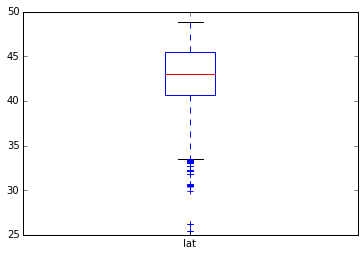

NON FIRES


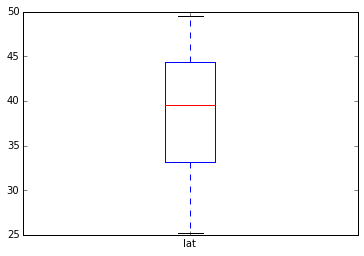

--------------------------------------------------
long
FIRES


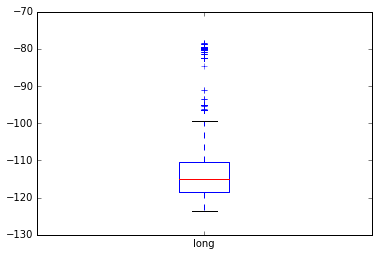

NON FIRES


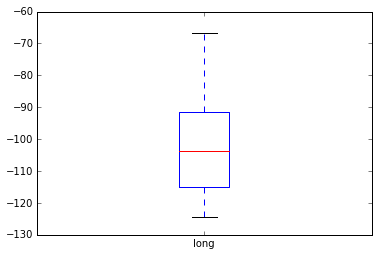

--------------------------------------------------
gmt
FIRES


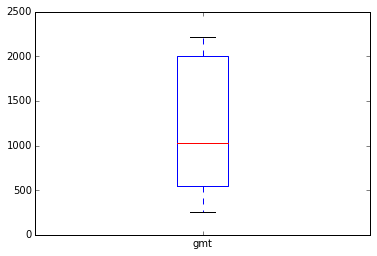

NON FIRES


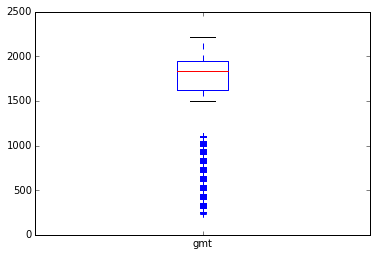

--------------------------------------------------
frp
FIRES


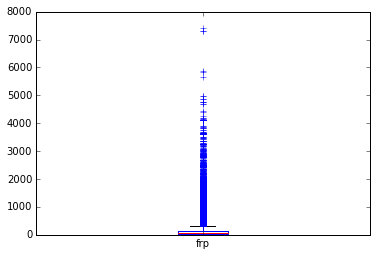

NON FIRES


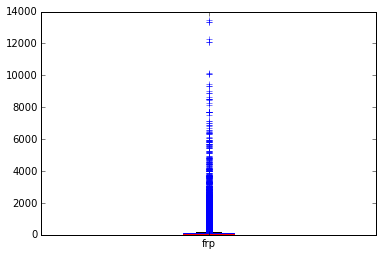

--------------------------------------------------
conf
FIRES


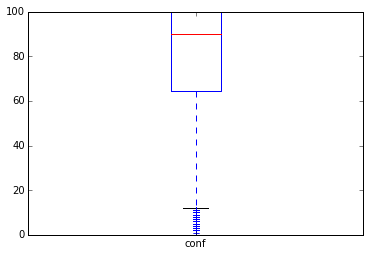

NON FIRES


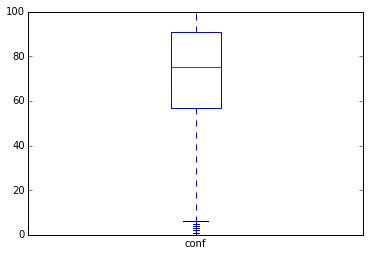

--------------------------------------------------
land_water_ratio
FIRES


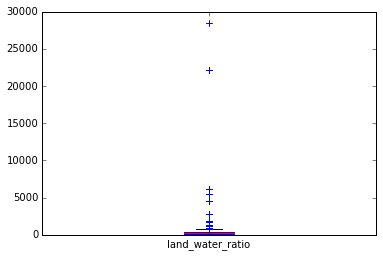

NON FIRES


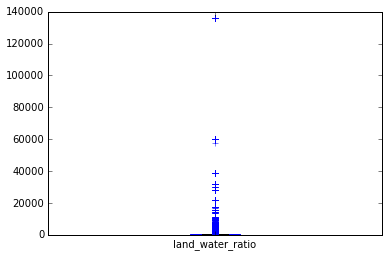

**************************************************
Discrete Variables
--------------------------------------------------
urban_areas_bool
FIRES
bool bool


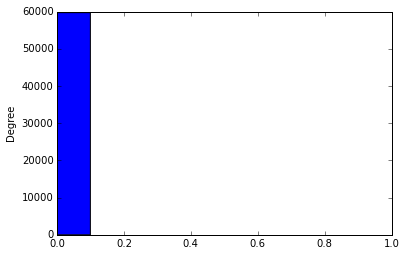

NON FIRES


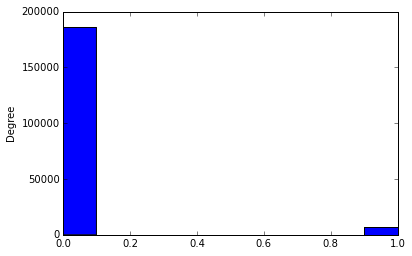

--------------------------------------------------
month
FIRES
int64 int64


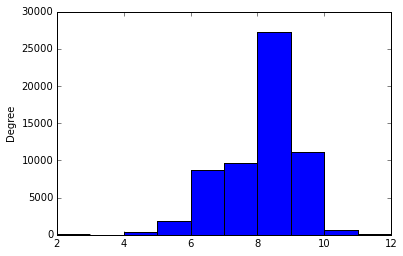

NON FIRES


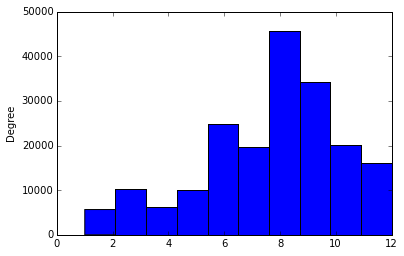

In [38]:
plotting_func(2012)

**************************************************
Continuous Variables
--------------------------------------------------
lat
FIRES


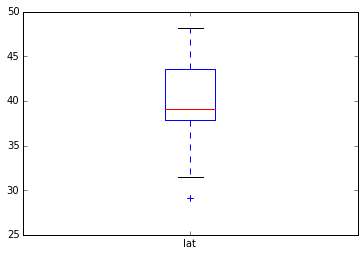

NON FIRES


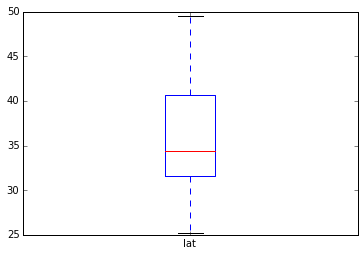

--------------------------------------------------
long
FIRES


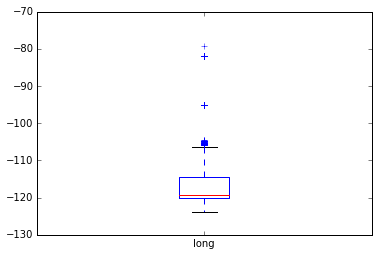

NON FIRES


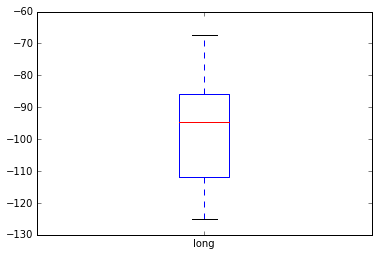

--------------------------------------------------
gmt
FIRES


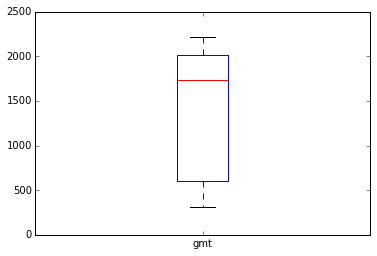

NON FIRES


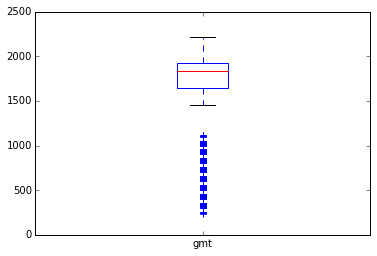

--------------------------------------------------
frp
FIRES


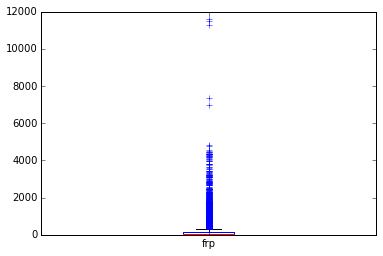

NON FIRES


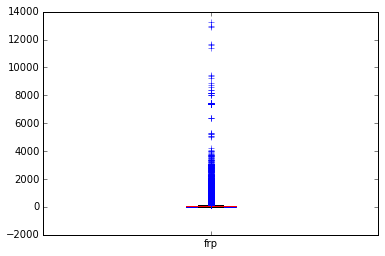

--------------------------------------------------
conf
FIRES


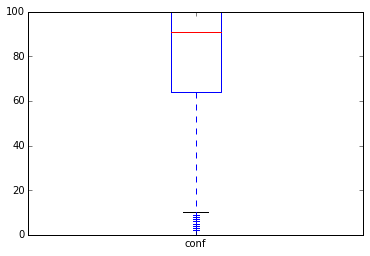

NON FIRES


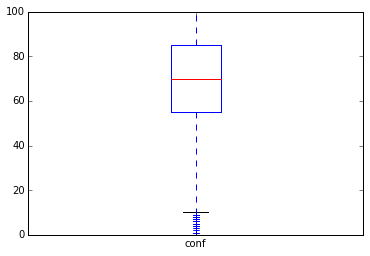

--------------------------------------------------
land_water_ratio
FIRES


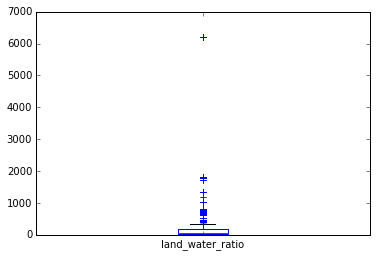

NON FIRES


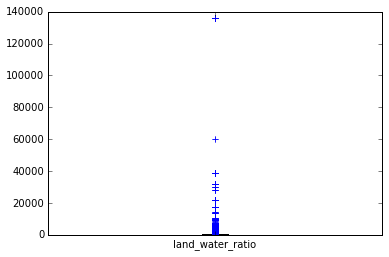

**************************************************
Discrete Variables
--------------------------------------------------
urban_areas_bool
FIRES
bool bool


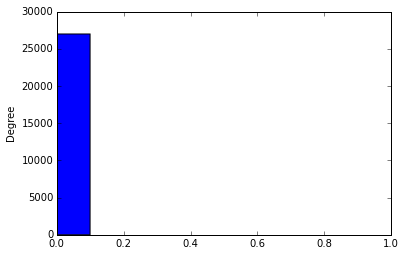

NON FIRES


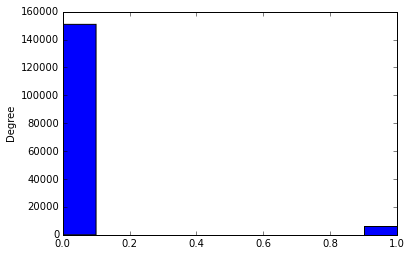

--------------------------------------------------
month
FIRES
int64 int64


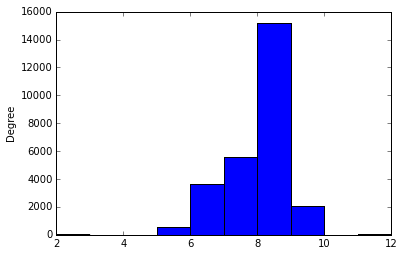

NON FIRES


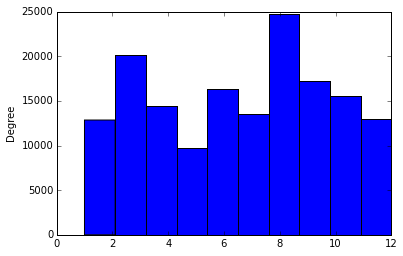

In [39]:
plotting_func(2013)

**************************************************
Continuous Variables
--------------------------------------------------
lat
FIRES


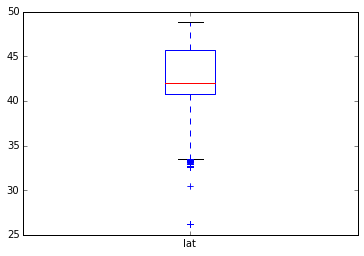

NON FIRES


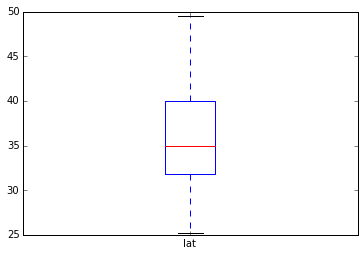

--------------------------------------------------
long
FIRES


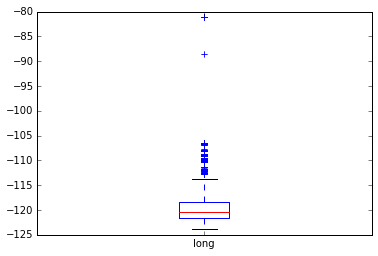

NON FIRES


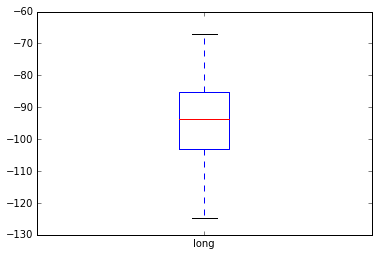

--------------------------------------------------
gmt
FIRES


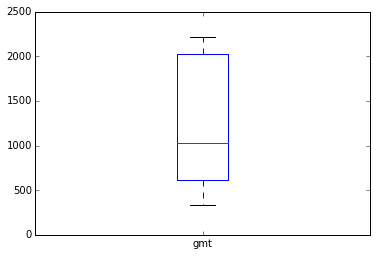

NON FIRES


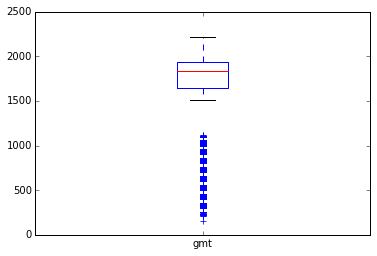

--------------------------------------------------
frp
FIRES


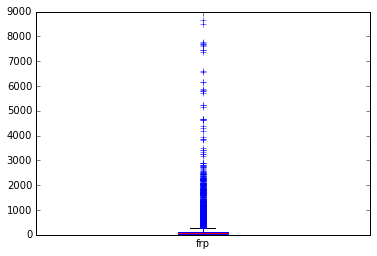

NON FIRES


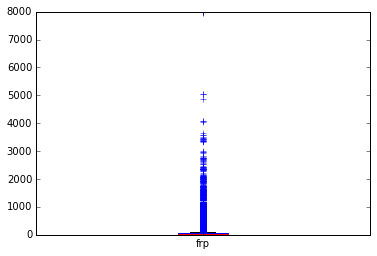

--------------------------------------------------
conf
FIRES


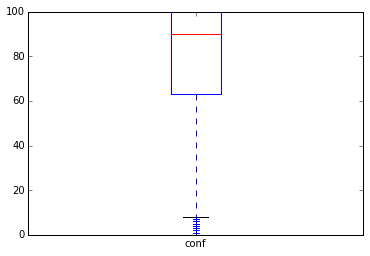

NON FIRES


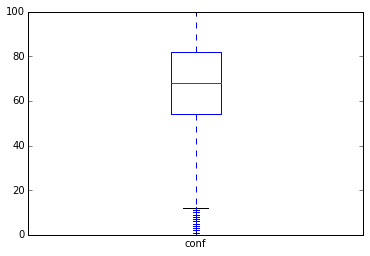

--------------------------------------------------
land_water_ratio
FIRES


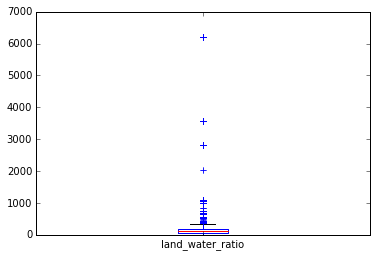

NON FIRES


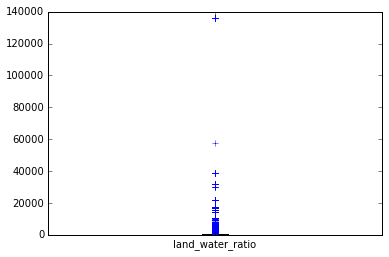

**************************************************
Discrete Variables
--------------------------------------------------
urban_areas_bool
FIRES
bool bool


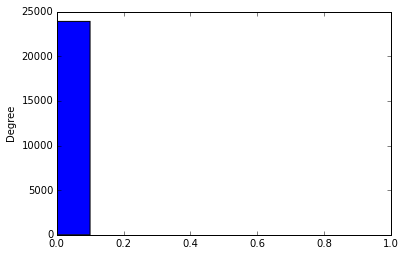

NON FIRES


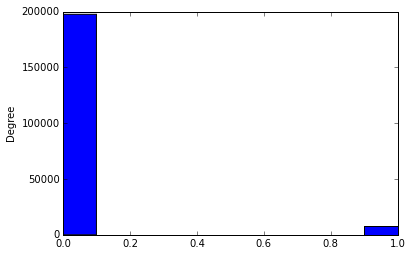

--------------------------------------------------
month
FIRES
int64 int64


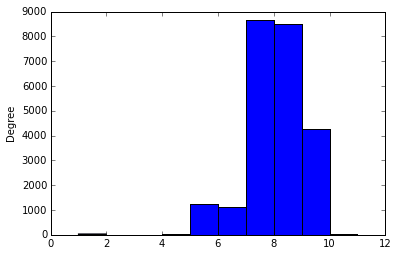

NON FIRES


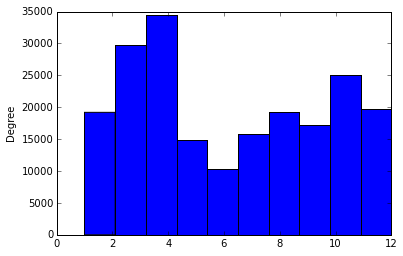

In [40]:
plotting_func(2014)

**************************************************
Continuous Variables
--------------------------------------------------
lat
FIRES


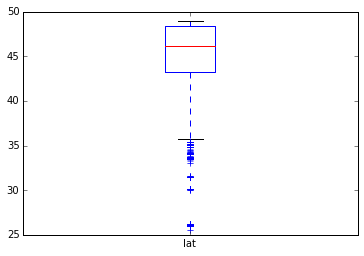

NON FIRES


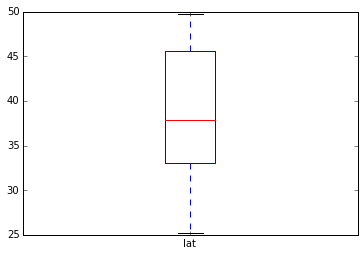

--------------------------------------------------
long
FIRES


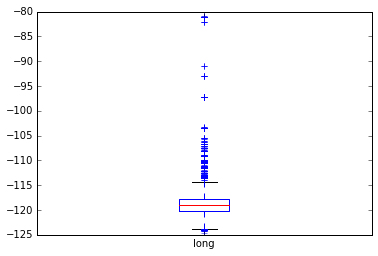

NON FIRES


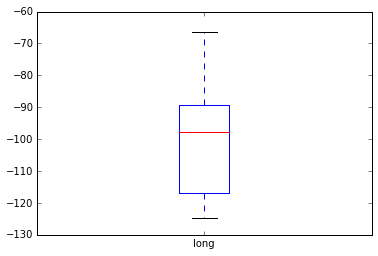

--------------------------------------------------
gmt
FIRES


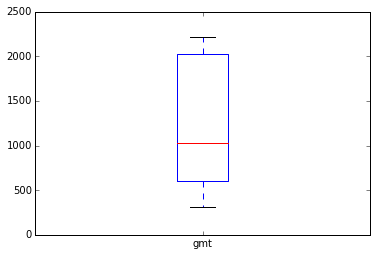

NON FIRES


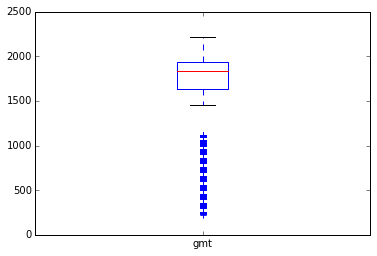

--------------------------------------------------
frp
FIRES


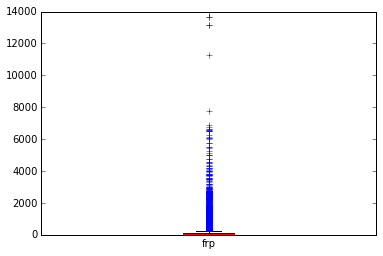

NON FIRES


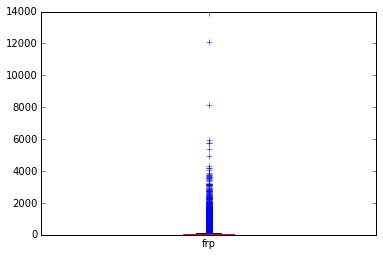

--------------------------------------------------
conf
FIRES


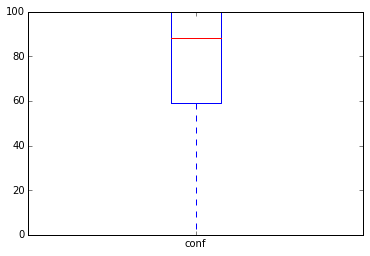

NON FIRES


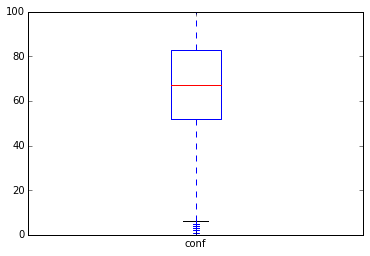

--------------------------------------------------
land_water_ratio
FIRES


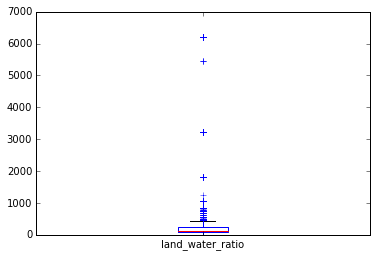

NON FIRES


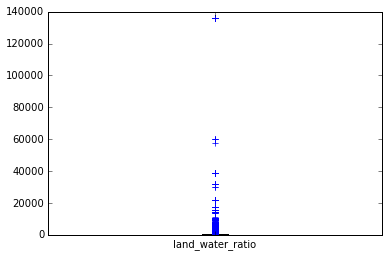

**************************************************
Discrete Variables
--------------------------------------------------
urban_areas_bool
FIRES
bool bool


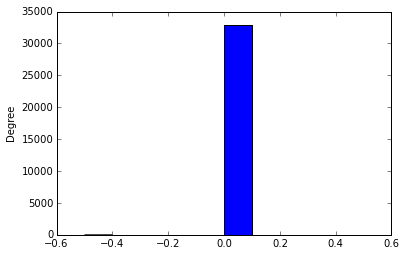

NON FIRES


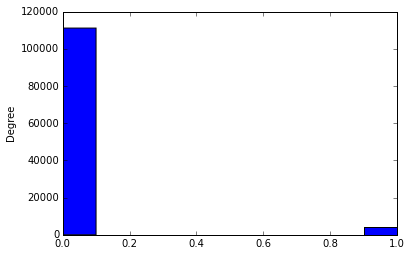

--------------------------------------------------
month
FIRES
int64 int64


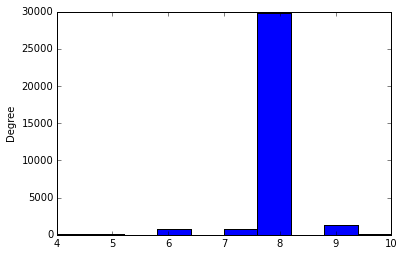

NON FIRES


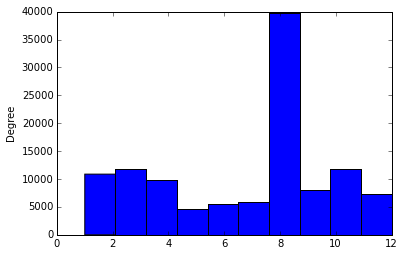

In [41]:
plotting_func(2015)